In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [2]:
import kagglehub

path = kagglehub.dataset_download("mdsultanulislamovi/sleep-disorder-diagnosis-dataset")

print("Path to dataset files:", path)

for file in os.listdir(path):
  print(file)

df = pd.read_csv(path + '/Sleep_health_and_lifestyle_dataset.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_')
df = df.drop(columns='Person_ID')
print(df.isna().sum())
df = df.dropna()
df.head()
numeric_cols = [
    "Age",
    "Sleep_Duration",
    "Quality_of_Sleep",
    "Physical_Activity_Level",
    "Stress_Level",
    "Heart_Rate",
    "Daily_Steps"
]
for col in numeric_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')
df["Systolic_BP"] = df["Blood_Pressure"].str.split("/", expand=True)[0].astype(int)
df["Diastolic_BP"] = df["Blood_Pressure"].str.split("/", expand=True)[1].astype(int)
df = df.drop(columns='Blood_Pressure')
df["Sleep_Binary"] = (df["Quality_of_Sleep"] >= 7).astype(int)
y = df["Sleep_Binary"]
X = df.drop(columns=["Quality_of_Sleep", "Sleep_Disorder", "Sleep_Binary"])

categorical_ordinal = ['Gender', 'BMI_Category']
categorical_onehot = ['Occupation']
preprocessor = ColumnTransformer(
    transformers = [
        ('ord', OrdinalEncoder(), categorical_ordinal),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_onehot)
    ],
    remainder='passthrough'
)
X_processed = preprocessor.fit_transform(X)
X_processed = pd.DataFrame(X_processed)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_processed = scaler.fit_transform(X_processed)
X_processed = pd.DataFrame(X_processed)

X_temp, X_test, y_temp, y_test = train_test_split(X_processed, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

X_train = np.array(X_train)
X_val   = np.array(X_val)
X_test  = np.array(X_test)

y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

C:\Users\Shush\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Shush\.cache\kagglehub\datasets\mdsultanulislamovi\sleep-disorder-diagnosis-dataset\versions\1
Sleep_health_and_lifestyle_dataset.csv
Gender                       0
Age                          0
Occupation                   0
Sleep_Duration               0
Quality_of_Sleep             0
Physical_Activity_Level      0
Stress_Level                 0
BMI_Category                 0
Blood_Pressure               0
Heart_Rate                   0
Daily_Steps                  0
Sleep_Disorder             219
dtype: int64


In [3]:
def accuracy(y_true, y_pred):
    return np.mean(y_true.flatten() == y_pred.flatten())

def precision(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    return TP / (TP + FP + 1e-9)

def recall(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    return TP / (TP + FN + 1e-9)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-9)

def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    return np.array([[TP, FP],
                     [FN, TN]])

Accuracy: 0.9583333333333334
Accuracy: 0.9583333333333334
Accuracy: 0.9166666666666666
Accuracy: 0.9583333333333334
Accuracy: 0.9583333333333334
Accuracy: 0.9583333333333334
Accuracy: 0.9583333333333334
Accuracy: 0.9166666666666666
Accuracy: 0.875
Accuracy: 0.875
Best k: 3
Best accuracy: 0.9583333333333334
FINAL TEST ACCURACY = 0.875


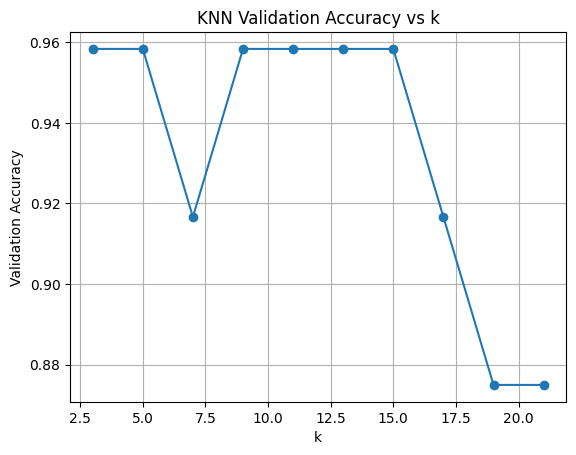

KNN Accuracy: 0.7916666666666666
KNN Precision: 0.8571428570816326
KNN Recall: 0.7999999999466667
KNN F1: 0.8275862063400713
KNN Confusion Matrix:
 [[12  2]
 [ 3  7]]


In [4]:
class LinearRegression_1:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        y = y.reshape(-1, 1)

        self.bias = 0
        self.weights = np.zeros((X.shape[1], 1))

        errors_array = []

        for _ in range(self.n_iterations):
            predictions = self.bias + X.dot(self.weights)

            errors = predictions - y

            D_bias = (2 / X.shape[0]) * np.sum(errors)
            D_weights = (2 / X.shape[0]) * (X.T.dot(errors))

            self.bias -= self.learning_rate * D_bias
            self.weights -= self.learning_rate * D_weights

            errors_array.append(np.mean(errors ** 2))

        return errors_array

    def predict(self, X):
        return self.bias + X.dot(self.weights)

    def score(self, X_test, y_test):
        y_test = y_test.reshape(-1, 1)
        predictions = self.predict(X_test)
        return np.mean((predictions - y_test) ** 2)

model = LinearRegression_1(
    learning_rate=0.05,
    n_iterations=2000
)
train_errors = model.fit(X_train, y_train)

plt.plot(train_errors)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Training Error (MSE) Curve")
plt.show()

train_mse = model.score(X_train, y_train)
print("Train MSE:", train_mse)

val_mse = model.score(X_val, y_val)
print("Val MSE:", val_mse)

test_mse = model.score(X_test, y_test)
print("Test MSE:", test_mse)

y_pred = model.predict(X_test).flatten()

plt.scatter(range(len(y_test)), y_test, label="Real")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted")
plt.legend()
plt.title("Real vs Predicted Quality of Sleep")
plt.show()

plt.bar(range(len(model.weights)), model.weights.flatten())
plt.title("Basic Feature Importance")
plt.show()

learning_rates = [0.001, 0.01, 0.1]
curves_lr = []

for lr in learning_rates:
    m = LinearRegression_1(learning_rate=lr, n_iterations=500)
    c = m.fit(X_train, y_train)
    curves_lr.append(c)

for i in range(len(learning_rates)):
    plt.plot(curves_lr[i], label=f"lr={learning_rates[i]}")

plt.legend()
plt.title("Learning Rate Comparison")
plt.show()

z = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
mask = np.all(np.abs(z) < 3, axis=1)

X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

model_clean = LinearRegression_1(learning_rate=0.05, n_iterations=2000)
curve_clean = model_clean.fit(X_train_clean, y_train_clean)

plt.plot(curve_clean)
plt.title("After Outlier Removal")
plt.show()

def polynomial_features(X):
    X2 = X ** 2
    return np.concatenate([X, X2], axis=1)
X_train_poly = polynomial_features(X_train)
X_val_poly = polynomial_features(X_val)
X_test_poly = polynomial_features(X_test)

model_poly = LinearRegression_1(learning_rate=0.05, n_iterations=2000)
curve_poly = model_poly.fit(X_train_poly, y_train)

plt.plot(curve_poly)
plt.title("Polynomial Regression Curve")
plt.show()

print("Poly Train MSE:", model_poly.score(X_train_poly, y_train))
print("Poly Val MSE:", model_poly.score(X_val_poly, y_val))
print("Poly Test MSE:", model_poly.score(X_test_poly, y_test))

plt.bar(range(len(model_poly.weights)), model_poly.weights.flatten())
plt.title("Polynomial Feature Importance")
plt.show()